In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hyades_df = pd.read_fwf("Hyades_star.dat")
m45_df = pd.read_csv("M45.csv")
tuc47_df = pd.read_csv("47Tuc.csv")
pleiades_df = pd.read_csv("pleiadesdata.csv")

In [3]:
hyades_df.drop(columns=["HIP","RA","DE","Plx","pmRA","pmDE","e_Plx"],inplace=True)
m45_df.drop(columns=["Star number"],inplace=True)
tuc47_df.drop(columns=["Star Number"],inplace=True)
pleiades_df.drop(columns=["Star number","B Mag"],inplace=True)

In [4]:
hyades_df.dropna(inplace=True)
m45_df.rename(columns={"Color(B-V)":"B-V","Magnitude":"Vmag"},inplace=True)
tuc47_df.rename(columns={"Color(B-V)":"B-V","Magnitude":"Vmag"},inplace=True)
pleiades_df.rename(columns={"CI =B-V":"B-V","V mag (m)":"Vmag"},inplace=True)

In [5]:
#Assuming all data is in terms of apparent magnitude
hyades_df = hyades_df[["B-V","Vmag"]]
m45_df = m45_df[["B-V","Vmag"]]
tuc47_df = tuc47_df[["B-V","Vmag"]]
pleiades_df = pleiades_df[["B-V","Vmag"]]

In [6]:
#Assuming distance from Earth to Hyades is 46.34pc
#M = m - 5*log(46.34/10)

hyades_df["M"] = hyades_df.loc[:]["Vmag"]-5*np.log10(46.34/10)
hyades_df.drop(columns=["Vmag"],inplace=True)
hyades_df.head()

,B-V,M
0,0.999,5.94022
1,0.778,5.32022
2,1.150,7.45022
3,1.030,7.24022
4,1.068,6.60022


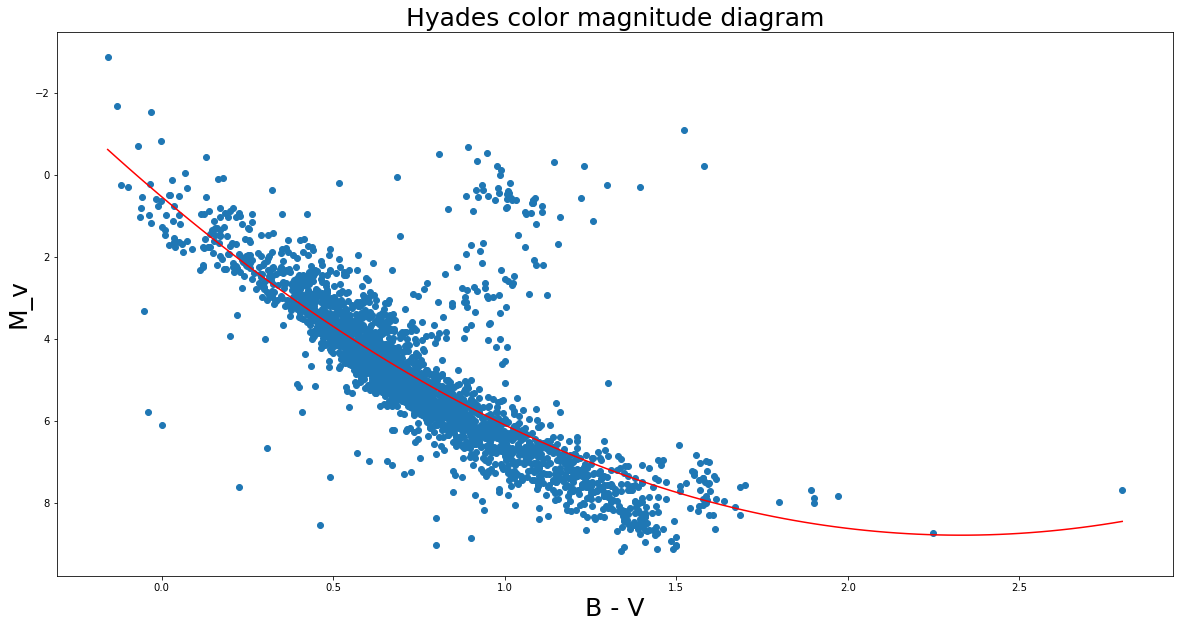

In [7]:
#Best fit line
plt.rcParams['figure.figsize'] = [20,10]
X = hyades_df["B-V"]
Y = hyades_df["M"]
model = np.poly1d(np.polyfit(X, Y, 2))
line = np.linspace(min(X), max(X), 100)
plt.gca().invert_yaxis()
plt.title("Hyades color magnitude diagram", fontsize=25)
plt.xlabel("B - V", fontsize=25)
plt.ylabel("M_v", fontsize=25)
plt.scatter(X,Y)
plt.plot(line, model(line),"r")
plt.show()

In [8]:
#Main Sequence Fitting
def msf(cluster_df,cluster_name,start,stop):
    plt.rcParams['figure.figsize'] = [20,10]
    
    X1 = hyades_df["B-V"]
    Y1 = hyades_df["M"]
    model1 = np.poly1d(np.polyfit(X1, Y1, 2))
    line1 = np.linspace(min(X1), max(X1), 1000)
    plt.scatter(X1,Y1)
    plt.plot(line1, model1(line1),"r",label="Hyades")
    
    X2 = cluster_df["B-V"]
    Y2 = cluster_df["Vmag"]
    model2 = np.poly1d(np.polyfit(X2, Y2, 2))
    line2 = np.linspace(min(X2), max(X2), 1000)
    plt.scatter(X2,Y2)
    plt.plot(line2, model2(line2),"g",label=cluster_name)
    
    plt.gca().invert_yaxis()
    plt.title(cluster_name+" Main Sequence Fitting", fontsize=25)
    plt.xlabel("B - V", fontsize=25)
    plt.ylabel("M_v", fontsize=25)
    plt.legend(fontsize=15)
    plt.show()
    offset=0
    for i in np.arange(start,stop,0.001):
        offset += model2(i)-model1(i)
    offset = offset/((stop-start)/0.001)
    distance = 10*(10**(offset/5))
    print("Mean Offset = ",offset)
    print("Distance = ",distance,"pc")

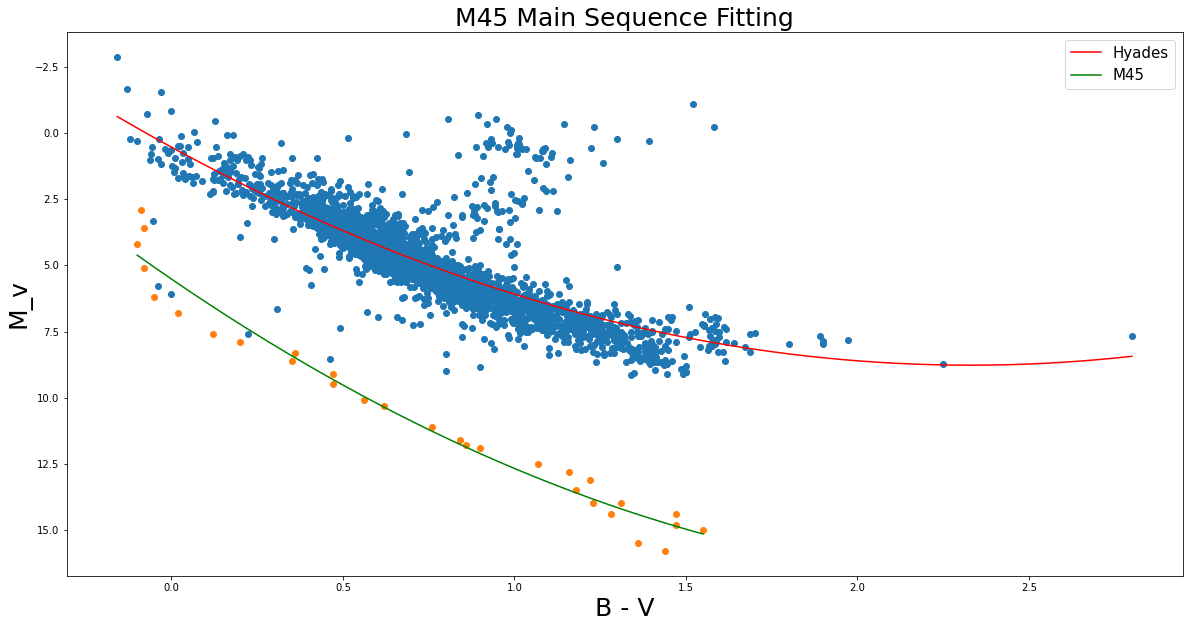

Mean Offset =  5.622579961341718
Distance =  133.2036091719272 pc


In [9]:
msf(m45_df,"M45",0,0.75)

In [10]:
def distance(model,x,y):
    return abs(model(x)-y)

In [11]:
#outlier removal
def outliers(cluster_df,threshold=1):
    for i in range(10):
        X = cluster_df["B-V"]
        Y = cluster_df["Vmag"]
        model = np.poly1d(np.polyfit(X, Y, 2))
        outliers = []
        for j in cluster_df.index:
            x = cluster_df.loc[j]["B-V"]
            if len(cluster_df)>100:
                y = cluster_df.loc[j]["M"]
            else:
                y = cluster_df.loc[j]["Vmag"] 
            if distance(model,x,y)>threshold:
                outliers.append(j)
        cluster_df.drop(index=outliers,inplace=True)

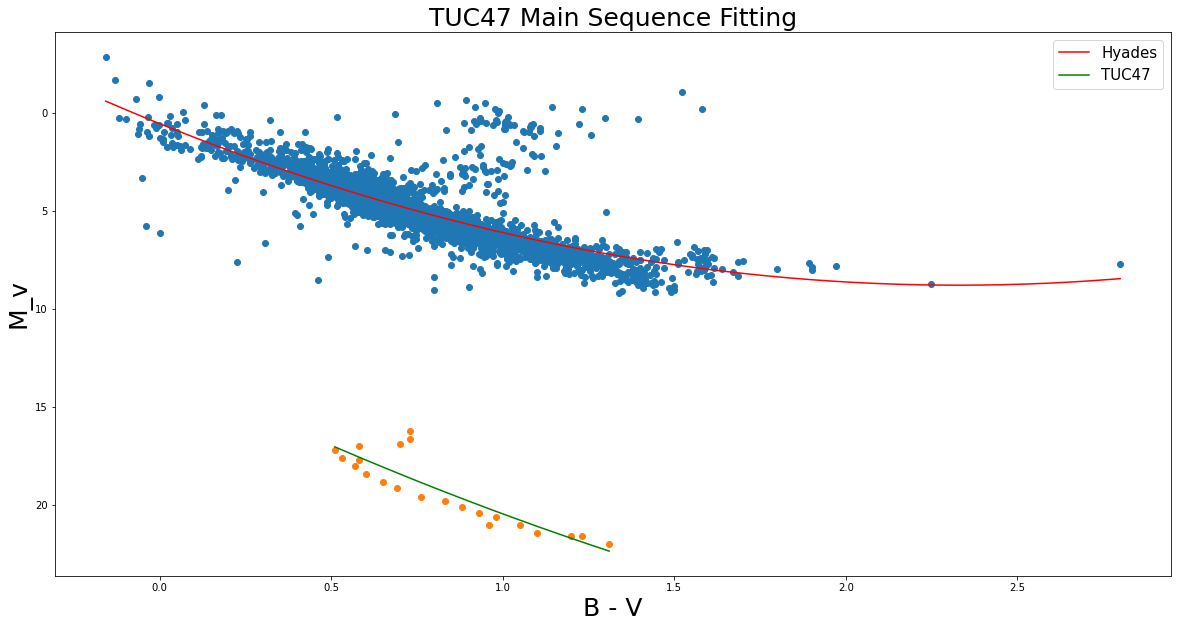

Mean Offset =  13.296836482566553
Distance =  4564.227638643155 pc


In [12]:
outliers(tuc47_df,3)
msf(tuc47_df,"TUC47",0,1)

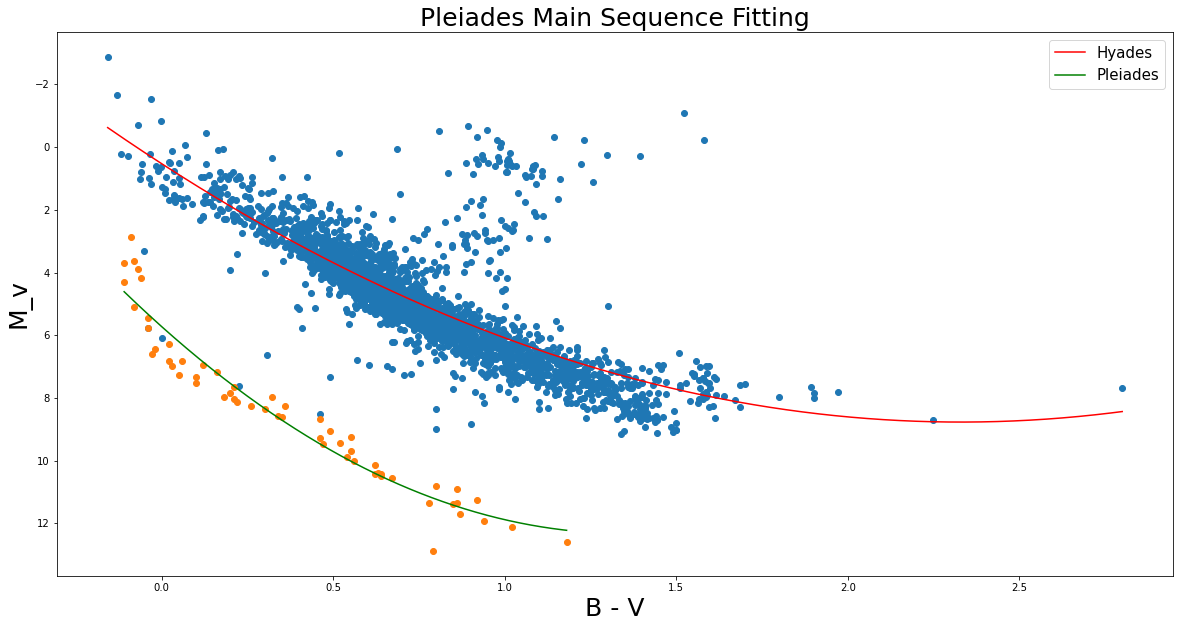

Mean Offset =  5.700622190216508
Distance =  138.07798416486264 pc


In [13]:
msf(pleiades_df,"Pleiades",0,0.5)